<a href="https://colab.research.google.com/github/datadigger01/AI-Trade/blob/main/LDA_TopicModel_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install gensim
#!pip install --upgrade gensim

In [4]:
!pip install konlpy
!pip install pyLDAvis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:

# -*- coding: utf-8 -*-
"""LDA_TopicModel_ex.ipynb - Refactored Version

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1tUDAIYnixIXUc9gMm0VKGs4Zq_TjtiVb
"""

# ============================================
# 패키지 설치 및 임포트
# ============================================
# !pip install --upgrade gensim
# !pip install konlpy
# !pip install pyLDAvis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import string
warnings.filterwarnings("ignore", category=DeprecationWarning, module='jupyter_client')

from gensim.parsing.preprocessing import preprocess_string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# 한국어 형태소 분석기
from konlpy.tag import Okt

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Topic Modeling
import gensim
from gensim import corpora, models
from gensim.models import TfidfModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### ============================================
#### 1. 데이터 로드
#### ============================================

In [6]:
# ============================================
# 1. 데이터 로드
# ============================================
print("=" * 60)
print("1. 데이터 로드 중...")
print("=" * 60)

df = pd.read_csv('https://raw.githubusercontent.com/datadigger01/AI-Trade/main/Data/trade_success_case_data.csv')
df['othbcDt'] = pd.to_datetime(df['othbcDt'])

print(f"전체 데이터 수: {len(df)}")

# bdtCntnt 컬럼 추출 및 결측치 제거
texts = df['bdtCntnt'].dropna().tolist()

print(f"유효한 텍스트 수: {len(texts)}")
print(f"평균 텍스트 길이: {np.mean([len(text) for text in texts]):.0f}자\n")

1. 데이터 로드 중...
전체 데이터 수: 194
유효한 텍스트 수: 194
평균 텍스트 길이: 2746자



#### ============================================
#### 2. 텍스트 전처리
#### ============================================

In [7]:
# ============================================
# 2. 텍스트 전처리
# ============================================
print("=" * 60)
print("2. 텍스트 전처리 중...")
print("=" * 60)

def combine_specific_words(text, word_pairs):
    """특정 단어 조합을 하나로 합치는 함수"""
    for word_pair in word_pairs:
        text = text.replace(word_pair, word_pair.replace(' ', ''))
    return text

def replace_specific_words(text, word_dict):
    """특정 단어를 다른 단어로 치환하는 함수"""
    for old_word, new_word in word_dict.items():
        text = text.replace(old_word, new_word)
    return text

def preprocess_korean_text(text):
    """한국어 텍스트 전처리"""
    if pd.isna(text):
        return ""

    # HTML 태그 제거
    text = re.sub(r'<[^>]*>', '', text)

    # E-mail 제거
    text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', text)

    # URL 제거
    text = re.sub(r'(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text)

    # 특수문자 제거 (한글, 영문, 공백만 유지)
    text = re.sub(r'[^가-힣a-zA-Z\s]', ' ', text)

    # 한글 자음, 모음 제거
    text = re.sub(r'([ㄱ-ㅎㅏ-ㅣ]+)', '', text)

    # 연속된 공백 제거
    text = re.sub(r'\s+', ' ', text)

    # 특수기호 제거
    text = re.sub(r'[^\w\s]', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 영어는 모두 대문자로 전환
    text = text.upper()

    # 특정 단어에 대한 변환, 조합 및 제거
    word_replacements = {
        'KOTRA': '코트라',
        '어플리케이션': '애플리케이션',
        '카메라': '캠코더',
    }
    text = replace_specific_words(text, word_replacements)

    # 특정 단어 조합을 먼저 결합
    word_pairs_to_combine = [
        '성공 사례',
        '중소 기업',
        '수출 전략',
        '시장 조사',
        '데이터 분석',
        '제품 개발',
        '생활 용품'
    ]
    text = combine_specific_words(text, word_pairs_to_combine)

    # 특정 단어 제거
    remove_words = [
        '바로가기',
        '성공사례',
        'RSQUO', 'LSQUO', 'LDQUO', 'RDQUO',
        '원문 슬기로운 코트라 활용법',
        '수출전문위원이 전하는 중소기업 수출성공스토리'
    ]
    for word in remove_words:
        text = text.replace(word, '')

    return text.strip()

# 전처리 적용
cleaned_texts = [preprocess_korean_text(text) for text in texts]
print("전처리 완료!\n")

2. 텍스트 전처리 중...
전처리 완료!



#### ============================================
#### 3. 한국어 형태소 분석 및 불용어 처리
#### ============================================

In [10]:
# ============================================
# 3. 한국어 형태소 분석 및 불용어 처리
# ============================================
print("=" * 60)
print("3. 형태소 분석기 설정...")
print("=" * 60)

# Okt 형태소 분석기 초기화
okt = Okt()
# kkma = Kkma()
# komoran = Komoran()
# hannanum = Hannanum()


# 한국어 불용어 리스트 (확장)
korean_stopwords = [
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자',
    '에', '와', '한', '하다', '을', '를', '에서', '으로', '로', '에게', '의해', '까지',
    '수', '것', '등', '및', '그', '저', '것', '또', '또한', '더', '매우', '정말',
    '위해', '통해', '대한', '관한', '따라', '대해', '년', '월', '일', '개', '명', '곳'
]

def tokenize_korean(text):
    """한국어 토큰화 (명사 추출 및 불용어 제거)"""
    # 명사만 추출
    nouns = okt.nouns(text)
    # nouns = kkma.nouns(text)
    # nouns = komoran.nouns(text)
    # nouns = hannanum.nouns(text)

    # 불용어 제거 및 2글자 이상만 선택
    tokens = [noun for noun in nouns
              if noun not in korean_stopwords and len(noun) > 1]

    return tokens

print("형태소 분석기 설정 완료!\n")

3. 형태소 분석기 설정...
형태소 분석기 설정 완료!



#### ============================================
#### 4. 토큰화 적용
#### ============================================

In [11]:
# ============================================
# 4. 토큰화 적용
# ============================================
print("=" * 60)
print("4. 토큰화 진행 중...")
print("=" * 60)

# 전처리된 텍스트에 토큰화 적용
tokenized_docs = [tokenize_korean(text) for text in cleaned_texts]

print(f"토큰화 완료! 총 {len(tokenized_docs)}개 문서")
print(f"\n샘플 토큰화 결과:")
for i in range(min(3, len(tokenized_docs))):
    print(f"문서 {i}: {tokenized_docs[i][:10]}...")  # 처음 10개 토큰만 출력

4. 토큰화 진행 중...
토큰화 완료! 총 194개 문서

샘플 토큰화 결과:
문서 0: ['보아스', '테크', '향균', '유독가스', '분해', '효능', '신비', '광물', '라이트', '활용']...
문서 1: ['믹스', '컴퍼니', '대표', '피트니스', '센터', '피트니스', '센터', '운동', '단백질', '보충']...
문서 2: ['트롤', '굴삭기', '건설', '장비', '유압', '펌프', '모터', '건설', '중장', '비용']...


#### ============================================
#### 5. Dictionary 및 Corpus 생성
#### ============================================

In [ ]:
# ============================================
# 5. Dictionary 및 Corpus 생성
# ============================================
print("\n" + "=" * 60)
print("5. Dictionary 및 Corpus 생성 중...")
print("=" * 60)

# Dictionary 생성
dictionary = corpora.Dictionary(tokenized_docs)

# 극단적인 단어 필터링
print(f"필터링 전 단어 수: {len(dictionary)}")
dictionary.filter_extremes(
    no_below=5,      # 5개 미만 문서에 등장하는 단어 제거
    no_above=0.5,    # 전체 문서의 50% 이상에 등장하는 단어 제거
    keep_n=1500      # 최대 1000개 단어만 유지
)
print(f"필터링 후 단어 수: {len(dictionary)}")

# Corpus 생성
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# TF-IDF 모델 생성 (선택사항)
tfidf = TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]

print("Dictionary 및 Corpus 생성 완료!\n")


5. Dictionary 및 Corpus 생성 중...
필터링 전 단어 수: 7299
필터링 후 단어 수: 1518
Dictionary 및 Corpus 생성 완료!



In [ ]:
# ============================================
# 6. LDA 모델 학습
# ============================================
print("=" * 60)
print("6. LDA 모델 학습 중...")
print("=" * 60)

# LDA 모델 학습
num_topics = 5

lda_model = LdaModel(
    corpus=corpus,
    # corpus=corpus_tfidf,  # TF-IDF를 사용하려면 이 줄을 활성화
    num_topics=num_topics,
    id2word=dictionary,
    eta='auto',
    alpha='auto',
    iterations=50,
    passes=10,
    eval_every=10,
    per_word_topics=True,
    random_state=42  # 재현성을 위해 추가
)

print(f"\nLDA 모델 학습 완료! (토픽 수: {num_topics})\n")

# 토픽별 주요 단어 출력
print("=" * 60)
print("각 토픽의 주요 단어:")
print("=" * 60)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"\n토픽 #{idx}:")
    print(topic)

6. LDA 모델 학습 중...

LDA 모델 학습 완료! (토픽 수: 5)

각 토픽의 주요 단어:

토픽 #0:
0.012*"부품" + 0.010*"산업" + 0.007*"환경" + 0.006*"에스" + 0.006*"러시아" + 0.006*"사절단" + 0.006*"원단" + 0.005*"제작" + 0.005*"품질" + 0.005*"코리아"

토픽 #1:
0.047*"비즈니스" + 0.047*"파트너" + 0.010*"경제" + 0.010*"유럽" + 0.009*"태국" + 0.009*"외교" + 0.008*"국가" + 0.008*"기회" + 0.007*"저희" + 0.006*"화장품"

토픽 #2:
0.013*"화장품" + 0.012*"브랜드" + 0.010*"마케팅" + 0.008*"마스크" + 0.007*"전시회" + 0.007*"발굴" + 0.007*"위원" + 0.007*"피부" + 0.007*"코리아" + 0.006*"지속"

토픽 #3:
0.014*"우리" + 0.011*"지사" + 0.010*"미국" + 0.008*"식품" + 0.007*"품질" + 0.007*"인증" + 0.006*"사용" + 0.005*"산업" + 0.005*"일본" + 0.005*"전시회"

토픽 #4:
0.012*"베트남" + 0.011*"위원" + 0.009*"아이" + 0.009*"기계" + 0.007*"엔지니어링" + 0.007*"전시회" + 0.006*"신규" + 0.006*"이후" + 0.006*"투자" + 0.006*"발굴"


In [ ]:
# ============================================
# 7. 모델 성능 평가
# ============================================
print("\n" + "=" * 60)
print("7. 모델 성능 평가...")
print("=" * 60)

# Perplexity (낮을수록 좋음)
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity:.4f}")

# Coherence Score (높을수록 좋음)
coherence_model = CoherenceModel(
    model=lda_model,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")


7. 모델 성능 평가...
Perplexity: -6.7801
Coherence Score: 0.3162



8. pyLDAvis 시각화...

9. WordCloud 생성...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


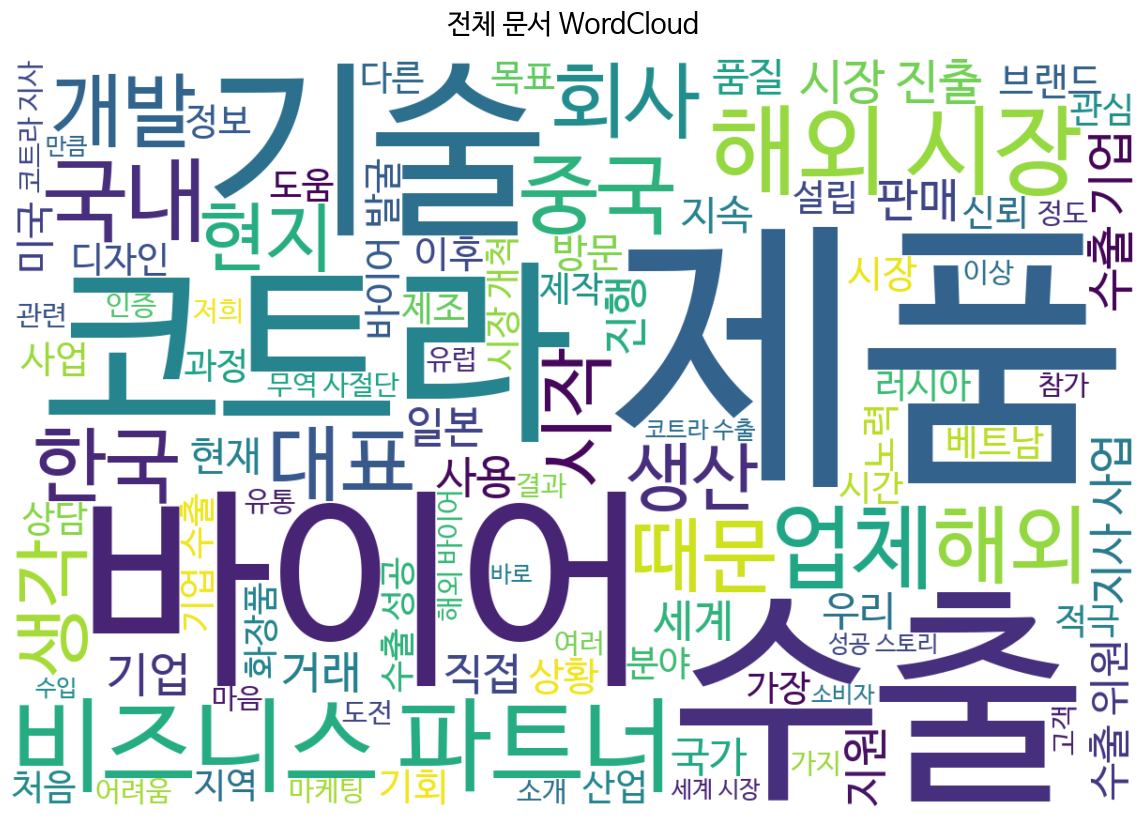

In [ ]:
# ============================================
# 8. pyLDAvis 시각화
# ============================================
print("\n" + "=" * 60)
print("8. pyLDAvis 시각화...")
print("=" * 60)

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(
    topic_model=lda_model,
    corpus=corpus,
    dictionary=dictionary,
    sort_topics=False
)

pyLDAvis.display(vis)

# HTML 파일로 저장 (선택사항)
# pyLDAvis.save_html(vis, 'lda_visualization.html')

# ============================================
# 9. WordCloud 생성
# ============================================
print("\n" + "=" * 60)
print("9. WordCloud 생성...")
print("=" * 60)

# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
from wordcloud import WordCloud

# 폰트 설정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rc('font', family='NanumBarunGothic')

# 모든 토큰을 하나의 문자열로 결합
all_words = [word for doc in tokenized_docs for word in doc]
words_string = ' '.join(all_words)

# WordCloud 생성
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    min_font_size=10,
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    max_words=100,
    relative_scaling=0.5,
    colormap='viridis'
).generate(words_string)

# WordCloud 시각화
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('전체 문서 WordCloud', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.show()


10. 토픽별 WordCloud 생성...


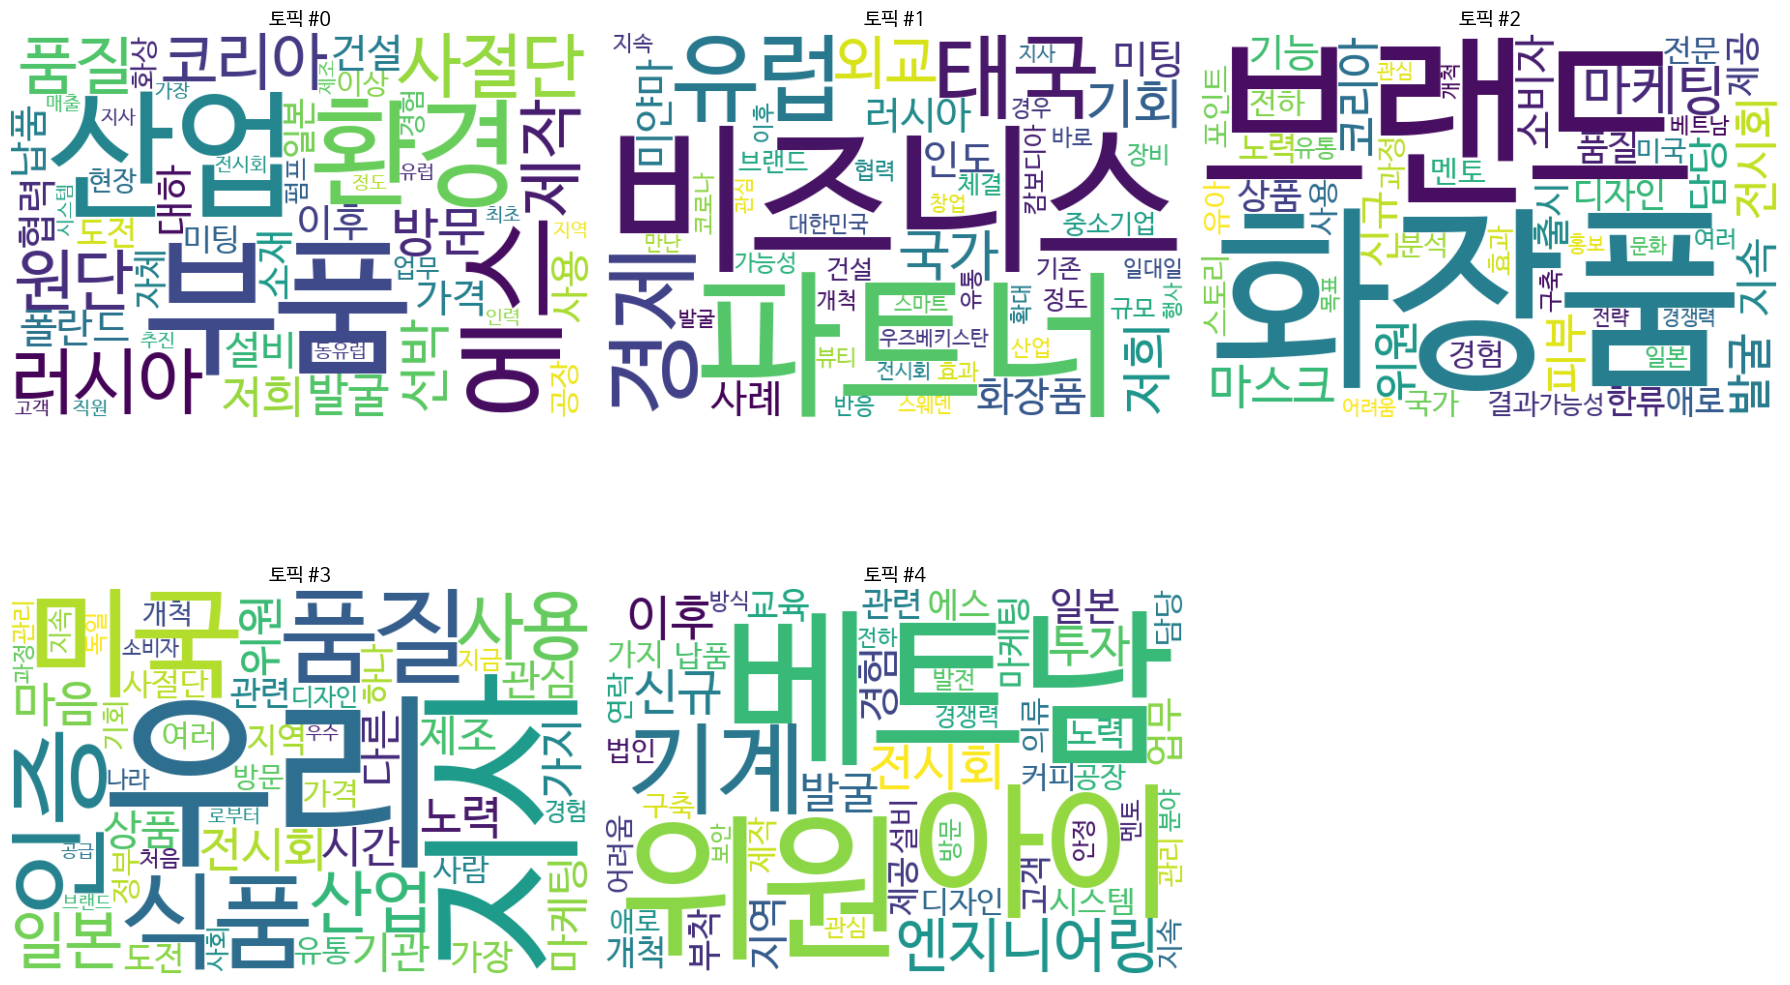

In [ ]:
# ============================================
# 10. 토픽별 WordCloud 생성 (선택사항)
# ============================================
print("\n" + "=" * 60)
print("10. 토픽별 WordCloud 생성...")
print("=" * 60)

# 토픽별 주요 단어 추출
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for topic_id in range(num_topics):
    # 해당 토픽의 단어-확률 딕셔너리 생성
    topic_words = dict(lda_model.show_topic(topic_id, topn=50))

    # WordCloud 생성
    wc = WordCloud(
        width=600,
        height=400,
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        colormap='viridis'
    ).generate_from_frequencies(topic_words)

    # 시각화
    axes[topic_id].imshow(wc, interpolation='bilinear')
    axes[topic_id].set_title(f'토픽 #{topic_id}', fontsize=14)
    axes[topic_id].axis('off')

# 빈 subplot 제거
if num_topics < len(axes):
    for i in range(num_topics, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 11. 문서별 토픽 분포 확인
# ============================================
print("\n" + "=" * 60)
print("11. 문서별 주요 토픽 분석...")
print("=" * 60)

def get_document_topics(lda_model, corpus, num_docs=5):
    """문서별 토픽 분포 확인"""
    results = []
    for idx in range(min(num_docs, len(corpus))):
        doc_topics = lda_model.get_document_topics(corpus[idx])
        # 가장 높은 확률의 토픽 찾기
        main_topic = max(doc_topics, key=lambda x: x[1])
        results.append({
            'doc_id': idx,
            'main_topic': main_topic[0],
            'probability': main_topic[1],
            'all_topics': doc_topics
        })
    return results

# 샘플 문서의 토픽 분포 확인
doc_topics_results = get_document_topics(lda_model, corpus, num_docs=10)

print("\n처음 10개 문서의 주요 토픽:")
for result in doc_topics_results:
    print(f"문서 {result['doc_id']}: "
          f"토픽 {result['main_topic']} "
          f"(확률: {result['probability']:.3f})")

print("\n" + "=" * 60)
print("LDA Topic Modeling 완료!")
print("=" * 60)


11. 문서별 주요 토픽 분석...

처음 10개 문서의 주요 토픽:
문서 0: 토픽 4 (확률: 0.578)
문서 1: 토픽 2 (확률: 0.445)
문서 2: 토픽 0 (확률: 0.998)
문서 3: 토픽 3 (확률: 0.763)
문서 4: 토픽 4 (확률: 0.997)
문서 5: 토픽 3 (확률: 0.998)
문서 6: 토픽 1 (확률: 0.736)
문서 7: 토픽 0 (확률: 0.521)
문서 8: 토픽 0 (확률: 0.608)
문서 9: 토픽 1 (확률: 0.999)

LDA Topic Modeling 완료!


In [ ]:
#import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary, sort_topics=False)
#vis = pyLDAvis.gensim_models.prepare(topic_model=lsimodel, corpus=corpus, dictionary=dictionary, sort_topics=False)


pyLDAvis.display(vis)

#lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
#pyLDAvis.save_html(lda_visualization, 'file_name.html')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re  # regular expression
import warnings
# Filter out DeprecationWarning specifically from jupyter_client
warnings.filterwarnings("ignore", category=DeprecationWarning, module='jupyter_client')

In [ ]:
import string

from gensim.parsing.preprocessing import preprocess_string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#### 한국어 형태소 분석기####
from konlpy.tag import Kkma, Komoran, Okt, Hannanum #Mecab은 윈도우에서 작동 불가능

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
#nltk.download('stopwords')

# Download required NLTK data (run once)
nltk.download('punkt', quiet=True) # Added this download
nltk.download('punkt_tab', quiet=True) # Added this download
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

#### ============================================
#### 1. 데이터 로드
#### ============================================

In [ ]:
# ============================================
# 1. 데이터 로드
# ============================================
print("=" * 60)
print("1. 데이터 로드 중...")
print("=" * 60)

df = pd.read_csv('https://raw.githubusercontent.com/datadigger01/AI-Trade/main/Data/trade_success_case_data.csv')
df['othbcDt'] = pd.to_datetime(df['othbcDt'])

print(f"전체 데이터 수: {len(df)}")

# bdtCntnt 컬럼 추출 및 결측치 제거
texts = df['bdtCntnt'].dropna().tolist()
#timestamps = df['othbcDt'].dt.year.to_list() # 토픽별 Time Series를 위한 년단위 timestamps

print(f"유효한 텍스트 수: {len(texts)}")
print(f"평균 텍스트 길이: {np.mean([len(text) for text in texts]):.0f}자\n")
print(f"데이터셋 정보:{df.info()}")

1. 데이터 로드 중...
전체 데이터 수: 194
유효한 텍스트 수: 194
평균 텍스트 길이: 2746자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   bdtCntnt   194 non-null    object        
 1   dataType   194 non-null    object        
 2   ovrofInfo  0 non-null      float64       
 3   dmgeAmt    0 non-null      float64       
 4   fraudType  0 non-null      float64       
 5   othbcDt    194 non-null    datetime64[ns]
 6   bbstxSn    194 non-null    int64         
 7   titl       194 non-null    object        
 8   natn       194 non-null    object        
 9   regn       194 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 15.3+ KB
데이터셋 정보:None


In [ ]:
texts[11]
#timestamps[3]

'국내 최초 UV-C LED 칫솔 살균기 개발2000년 설립된 비에네스소프트는 소프트웨어 개발 기업이자 \'울트라웨이브\'라는 브랜드로살균에 초점을 맞춘 퍼스널 헬스케어 제품을 개발&middot;제조&middot;수출하는 기업이다.독립채산제로 운영되는 특성상 회사 내 아이담 사업부에서 \'울트라웨이브\' 사업을 총괄한다.원래 아이담 사업부에서는 보이스레코더와 MP3 같은 음향기기를 대부분 ODM 방식으로납품해 왔다. 스마트폰 사용이 보편화되면서 음향기기 시장 규모가 줄어들자 친환경 반도체 광원인UV LED로 눈을 돌려 2018년 국내 최초로 UV-C LED 칫솔 살균기 개발에 성공했다.기존 UV램프 칫솔 살균기는 UV램프 안에 수은이 들어 있고, 살균 과정에서 오존을 발생기키기때문에 비릿한 냄새가 나는 단점이 있었다. UV LED 파장 중 UV-C를 사용한 울트라웨이브칫솔 살균기는 3분이면 뮤탄스균&middot;녹농균&middot;대장균&middot;황색포도상구균을 99.9%를 살균한다.수은을 함유하고 있지 않아 친환경적이고, 오존을 발생시키지 않아 불쾌감 없이 쓸 수 있다.EU의 전기&middot;전자제품 유해물질사용제한(RoHS) 인증을 취득했고,미국 FDA 승인, 미국 FOC 인증, 유럽 CD 인증도 완료했다.화상상담으로 해외 시장 확대 가능성을 보다비에네스소프트는 칫솔 살균기, 면도기 살균기, 마스크 살균기 등 UV LED 살균기 라인과 함께EARPET(반려동물의 귀 질환&middot;염증을 치료하는 동물의료기기,PEPPI3(반려동물 전용 MP3) 등펫헬스케어 라인을 구성했지만 2020년, 코로나19라는 변수를 맞았다.코로나19로 참가 예정이었던 해외 전시회가 줄줄이 취소되는 상황이 발생한 것이다.   "2019년에 해외 시장 조사와 신규 바이어 영업을 위해 KOTRA에 도움을 요청했다면, 2020년에는 영국, 스페인, 독일, 미국, 싱가포르, 홍콩, 말레이시아, 태국, 칠레 등 여러 국가의 기업들과 화상상담회를 진행했습니다. 해외 시장을 확대하려는 중

##### ============================================
##### 2. 텍스트 전처리
##### ============================================

In [ ]:
# ============================================
# 2. 텍스트 전처리
# ============================================
print("=" * 60)
print("2. 텍스트 전처리 중...")
print("=" * 60)

def combine_specific_words(text, word_pairs):
    """특정 단어 조합을 하나로 합치는 함수"""
    for word_pair in word_pairs:
        # 공백이 있는 형태를 공백 없는 형태로 변환
        text = text.replace(word_pair, word_pair.replace(' ', ''))
    return text

def replace_specific_words(text, word_dict):
    """특정 단어를 다른 단어로 치환하는 함수"""
    for old_word, new_word in word_dict.items():
        text = text.replace(old_word, new_word)
    return text

def preprocess_korean_text(text):
    """한국어 텍스트 전처리"""
    if pd.isna(text):
        return ""  ## doucument가 결측인경우 NaN return

    #########  특수문자 포함 정제처리할 단어 처리(삭제)
    # HTML 태그 제거
    pattern = r'<[^>]*>'
    text = re.sub(pattern, '', text)
    ## HTML 태그 제거
    ##text = re.sub(r'&[a-z]+;', ' ', text)

    # E-mail제거
    pattern = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
    text = re.sub(pattern, '', text)

    # URL제거
    pattern = r'(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    text = re.sub(pattern, '', text)
    ## Remove URLs
    # text = re.sub(r'http\S+|www.\S+', '', text)

    # 특수문자 제거 (한글, 영문, 공백만 유지)
    text = re.sub(r'[^가-힣a-zA-Z\s]', ' ', text)
    #text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)

    # 한글 자음, 모음 제거
    pattern = r'([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern, '', text)

    # 연속된 공백 제거
    text = re.sub(r'\s+', ' ', text)
    # # 연속 공백 정리
    # text = ' '.join(text.split())

    # 특수기호제거
    #pattern = r'[^\w\s]'
    text = re.sub(r'[^\w\s]', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 영어는 모두 대문자로 전환
    text = text.upper()

    ###########################################################################
    ##  특정 단어에 대한 변환, 조합 및 제거
    ###########################################################################
    # 토큰화 전에 특정 단어를 다른 단어로 치환
    word_replacements = {
        'KOTRA': '코트라',
        '어플리케이션': '애플리케이션',
        '카메라': '캠코더',  # 예시
        # 필요한 단어 치환을 여기에 추가하세요
    }
    text = replace_specific_words(text, word_replacements)

    # 토큰화 전에 특정 단어 조합을 먼저 결합
    word_pairs_to_combine = [
        '성공 사례',
        '중소 기업',
        '수출 전략',
        '시장 조사',
        '데이터 분석',
        '제품 개발',
        '생활 용품'
        # 필요한 단어 조합을 여기에 추가하세요
    ]
    text = combine_specific_words(text, word_pairs_to_combine)

    # 특정 단어 제거
    remove_words = ['바로가기',
                    '성공사례',
                    'RSQUO','LSQUO','LDQUO','RDQUO',
                    '원문 슬기로운 코트라 활용법',
                    '수출전문위원이 전하는 중소기업 수출성공스토리'
                    ]
    for word in remove_words:
        text = text.replace(word, '')

    return text.strip()

# 전처리 적용
cleaned_texts = [preprocess_korean_text(text) for text in texts]
print("전처리 완료!\n")

2. 텍스트 전처리 중...
전처리 완료!



In [ ]:
cleaned_texts[11]

'국내 최초 UV C LED 칫솔 살균기 개발 년 설립된 비에네스소프트는 소프트웨어 개발 기업이자 울트라웨이브 라는 브랜드로살균에 초점을 맞춘 퍼스널 헬스케어 제품을 개발 MIDDOT 제조 MIDDOT 수출하는 기업이다 독립채산제로 운영되는 특성상 회사 내 아이담 사업부에서 울트라웨이브 사업을 총괄한다 원래 아이담 사업부에서는 보이스레코더와 MP 같은 음향기기를 대부분 ODM 방식으로납품해 왔다 스마트폰 사용이 보편화되면서 음향기기 시장 규모가 줄어들자 친환경 반도체 광원인UV LED로 눈을 돌려 년 국내 최초로 UV C LED 칫솔 살균기 개발에 성공했다 기존 UV램프 칫솔 살균기는 UV램프 안에 수은이 들어 있고 살균 과정에서 오존을 발생기키기때문에 비릿한 냄새가 나는 단점이 있었다 UV LED 파장 중 UV C를 사용한 울트라웨이브칫솔 살균기는 분이면 뮤탄스균 MIDDOT 녹농균 MIDDOT 대장균 MIDDOT 황색포도상구균을 를 살균한다 수은을 함유하고 있지 않아 친환경적이고 오존을 발생시키지 않아 불쾌감 없이 쓸 수 있다 EU의 전기 MIDDOT 전자제품 유해물질사용제한 ROHS 인증을 취득했고 미국 FDA 승인 미국 FOC 인증 유럽 CD 인증도 완료했다 화상상담으로 해외 시장 확대 가능성을 보다비에네스소프트는 칫솔 살균기 면도기 살균기 마스크 살균기 등 UV LED 살균기 라인과 함께EARPET 반려동물의 귀 질환 MIDDOT 염증을 치료하는 동물의료기기 PEPPI 반려동물 전용 MP 등펫헬스케어 라인을 구성했지만 년 코로나 라는 변수를 맞았다 코로나 로 참가 예정이었던 해외 전시회가 줄줄이 취소되는 상황이 발생한 것이다 년에 해외 시장조사와 신규 바이어 영업을 위해 코트라에 도움을 요청했다면 년에는 영국 스페인 독일 미국 싱가포르 홍콩 말레이시아 태국 칠레 등 여러 국가의 기업들과 화상상담회를 진행했습니다 해외 시장을 확대하려는 중소기업 특히 신제품을 개발한 기업에게는 해외 전시회 참여가 필수인데 코로나 로 인해 해외 출장마저 갈 수 없는 막막한

#### ============================================
#### 3. 한국어 형태소 분석 및 불용어 처리
#### ============================================

In [ ]:
# ============================================
# 3. 한국어 형태소 분석 및 불용어 처리
# ============================================
print("=" * 60)
print("3. 형태소 분석기 설정...")
print("=" * 60)

# Okt 형태소 분석기 초기화
okt = Okt()
# kkma = Kkma()
# komoran = Komoran()
# hannanum = Hannanum()

# 한국어 불용어 리스트
korean_stopwords = [
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자',
    '에', '와', '한', '하다', '을', '를', '에서', '으로', '로', '에게', '의해', '까지',
    '수', '것', '등', '및', '그', '저', '것', '또', '또한', '더', '매우', '정말'
]


def tokenize_korean(text):
    """한국어 토큰화 (명사 추출)"""
    # 명사만 추출
    nouns = okt.nouns(text)
    # nouns = kkma.nouns(text)
    # nouns = komoran.nouns(text)
    # nouns = hannanum.nouns(text)

    # 불용어 제거 및 2글자 이상만 선택
    tokens = [noun for noun in nouns if noun not in korean_stopwords and len(noun) > 1]
    return ' '.join(tokens)

def clean_stopwords(text):
    """영어 불용어 제거 (한글 텍스트에는 효과 제한적)"""
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 2])

print("형태소 분석기 설정 완료!\n")

3. 형태소 분석기 설정...
형태소 분석기 설정 완료!



In [ ]:
tokenize_korean(cleaned_texts[11])

'국내 최초 칫솔 살균 개발 설립 에네스 소프트 소프트웨어 개발 기업 이자 울트라 웨이브 브랜드 살균 초점 퍼스 스케 제품 개발 제조 수출 기업 독립채산제 운영 특성 회사 아이 사업 울트라 웨이브 사업 총괄 원래 아이 사업 보이스 레코 음향 기기 대부분 방식 납품 스마트폰 사용 보편화 음향 기기 시장 규모 친환경 반도체 광원 국내 최초 칫솔 살균 개발 기존 램프 칫솔 살균 램프 수은 살균 과정 오존 발생 기키 때문 비릿 냄새 단점 파장 사용 울트라 웨이브 칫솔 살균 뮤탄스균 녹농균 대장균 황색포도상구균 살균 수은 함유 친환경 오존 발생 불쾌감 전기 전자제품 유해 물질 사용제한 인증 취득 미국 승인 미국 인증 유럽 인증 완료 화상 상담 해외 시장 확대 가능성 다비 에네스 소프트 칫솔 살균 면도기 살균 마스크 살균 살균 라인 반려동물 질환 염증 치료 동물 의료기기 반려동물 전용 펫헬 스케 라인 구성 코로나 변수 코로나 참가 예정 해외 전시회 줄줄이 취소 상황 발생 해외 시장조사 신규 바이어 영업 위해 코트라 도움 요청 영국 스페인 독일 미국 싱가포르 홍콩 말레이시아 태국 칠레 여러 국가 기업 화상 상담 진행 해외 시장 확대 중소기업 신제품 개발 기업 해외 전시회 참여 필수 코로나 해외 출장 상황 화상 상담 희망이 진행 함부르크 무역 화상 상담 무엇 성과 화상 상담 에네스 소프트 함부르크 무역 제품 유통 화상 상담 제안 화상 상담 진행 쿠쿠 전자 유럽 업체 아마존 독일 유럽 온라인 플랫폼 한국 롯데 하이마트 오프라인 유통 라인 보유 화상 상담 덕분 독일 샘플 물량 추출 세계 퍼스 스케 살균 시장 울트라 웨이브 제품 대해 관심 대감 표현 제품 기능 위주 질문 답변 양사 추구 유통 방향 대해 서도 협의 테스트 물량 수출 에네스 소프트 현재 아마존 독일 론칭 준비 중이 독일 전체 제품 유통 대해 서도 논의 에네스 소프트 여러 차례 화상 상담 계기 하반기 달러 규모 신규 수출 예상 코로나 오히려 에네스 소프트 기회 코로나 이전 바이어 퍼스 스케 살균 시간 설득 코로나 대유

In [ ]:
# Topic Modeling
import gensim
from gensim import corpora, models
from gensim.models import TfidfModel,LdaModel, LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
dictionary = corpora.Dictionary(tokenized_abst)
dictionary.filter_extremes(no_below=5, no_above=0.5) # 빈도 2이상 포함, 전체 50% 이상 단어 제거
corpus = [dictionary.doc2bow(text) for text in tokenized_abst]

tfidf = TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]

warnings.filterwarnings("ignore", category=DeprecationWarning, module='jupyter_client')
# LSI model
# lsimodel = LsiModel(corpus, num_topics=7, id2word=dictionary)
# topics_lsi = lsimodel.print_topics()
# topics_lsi

# LDA Model
lda_model = LdaModel(
                     corpus,
                    #  corpus_tfidf,
                     num_topics=5,
                     id2word=dictionary,
                     eta='auto',
                     alpha='auto',
                     #random_state= 3231,
                     iterations=50,
                     passes= 10,
                     eval_every=10,
                     per_word_topics=True
                     )
topics = lda_model.print_topics()
topics



In [ ]:
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()

In [ ]:
print(okt.phrases(cleaned_texts[0],stem=True, norm=True))

TypeError: Okt.phrases() got an unexpected keyword argument 'stem'

In [ ]:
#### .morphs()함수: 텍스트를 형태소 단위로 나누어준다.####
#print("[Kkma morphs 함수]")
#print(kkma.morphs(text))
#print("[Okt 함수]")
#print(okt.morphs(text)) # Original code that caused the error
#print("[Komoran 함수]")
#print(komoran.morphs(text))
#print("[Hannanum 함수]")
#print(hannanum.morphs(text))

#tokenized_text = df['bdtCntnt'].apply(okt.morphs) # Corrected code to apply the function to each element
#tokenized_text

In [ ]:
df['bdtCntnt'] = df['bdtCntnt'].apply(clean_text)
df['bdtCntnt'] = df['bdtCntnt'].apply(clean_stopwords)

df.head(5)

bdtCntnt dataType  ovrofInfo  \
0  보아스테크는 향균과 유독가스 효능이 신비의 일라이트를활용해탈취제 화장품 생활용품을 ...      4유형        NaN   
1  믹스콘컴퍼니 하영은 대표는 피트니스센터에서피트니스센터에서 운동을 나면단백질 보충제를...      4유형        NaN   
2  모트롤은 굴삭기 건설장비에 들어가는 펌프와 중장비용 장비를생산하는 업체이다 부분뿐 ...      4유형        NaN   
3  니즈더펫 반려동물 중에서도 대형견을 위한아웃도어제품을생산한다 활동성이 대형견을 산책...      4유형        NaN   
4  의류학과 꼬꼬잠 박정혜 대표는 아이를 바닥에 자지못했다 아이를 재웠다가 눕히면 아이...      4유형        NaN   

   dmgeAmt  fraudType     othbcDt  bbstxSn  \
0      NaN        NaN  2022-12-09   199116   
1      NaN        NaN  2022-11-04   198065   
2      NaN        NaN  2022-10-19   197606   
3      NaN        NaN  2022-09-20   196935   
4      NaN        NaN  2022-09-02   196519   

                                 titl natn regn  
0                SNS 마케팅을 통해 해외 판로 개척   북미   미국  
1  해외시장조사를 통한 타겟 시장 선정 및 바이어 발굴로 수출성공   북미   미국  
2              FTA 활용으로 제품의 가격 경쟁력 제고  아시아   중국  
3               정부 지원사업 활용으로 수출 비용 절감   북미   미국  
4                진성 바이어 판별이 수출 성패 좌우!   북미   미국

In [ ]:
#df['bdtCntnt'][52]

'진출에 사업가의 도전이제 년차를 넘어선 스타트업인 메종은 화장품이 코스메슈티컬 제품을만드는 바이오헬스케어 기업이다 코스메슈티컬은 의학적 생물학적 효과가 있는활성 성분을 가지고 효과를 나타내는 화장품을 뜻한다 메종의 브랜드인 천연과 유기농 재료를 사용하고 방부제나 등을전혀 기능성 화장품이다 국내에서도 화장품 매장이 병원이나 등에서판매하고 중소기업이 성공하려면 대기업보다 제품을 만들어야 각오로제품의 연구개발에 양정철 대표는 국내에서 바이오헬스 주자가 해외에서는코스메슈티컬 트렌드의 선두주자로 서겠다는 계획을 가슴에 있었다 목표를 실천하기 메종은 제품의 출시와 인증도 준비했다 시장에 진출하기 국가의 허가를 과정은 복잡하고 시간과 비용이 듭니다 마케팅 마찬가지로 아무것도 땅에서 씨앗을 뿌리고 열매를 때까지 기다림의 연속입니다 수출에 모르기 때문에 상황마다 막막한데 아득한 장막을 거둬준 였습니다 양정철 대표는 절차나 수출에 궁금한 마다수시로 기관에 적극적으로 자문을 구했다 별다른 홍보나 광고는 않았지만 전시회만큼은 정도로 시장에열심히 두드렸다 양정철 대표의 노력은 성과로 나타났다 제품도 바이어들의 저희는 처음부터 아세안 시장을 염두에 개발을 했습니다 중국과 동남아시아에서 화장품은 다릅니다 말레이시아에서 대학을 다녔기 때문에 친근한 시장이기도 합니다 그처럼 동남아시아 시장을 타깃으로 제품을 개발했지만 전시회에 나갔을 바이어들의 반응이 없었습니다 바이어 입장에서 제품이기 때문에 별다른 호감을 보이지 않다가 국가를 반복해서 나가자 바이어들이 품질로 제품을 알아봐주기 시작했습니다 공격적으로 시장을 두드린 덕분에 제품이 나오고 년부터는동남아시아에 미백크림과 마스크팩 화장품을 판매하는 등수출 실적이 급격히 시작했다 전시회 참여만이 아니라 지역에서 시장개척단 바이어를 있는다양한 행사에 참여하던 양정철 대표는 태국에서 비즈니스 파트너십이열린다는 소식을 들었다 국가의 정상이 참여하는 비즈니스 파트너십이라면 회사의이미지를 확실히 있겠다는 생각이 들었다 패기를 내밀고 되돌려 열매비즈니스 

In [ ]:
tokenized_text = df['bdtCntnt'].apply(preprocessing)
tokenized_text = tokenized_text.to_list()
tokenized_text

[['보아스테크는',
  '향균과',
  '유독가스',
  '효능이',
  '신비의',
  '일라이트를활용해탈취제',
  '화장품',
  '생활용품을',
  '제작하여',
  '판매하는회사이다',
  '최영준',
  '대표는',
  '년대가습기',
  '살균제',
  '사건과',
  '침대사건',
  '경험하면서',
  '속에화학물질이얼마나가깝게침투하고있는지',
  '체감했다',
  '친환경',
  '생활을',
  '있는용품을개발하고싶다는갈망은',
  '창업으로',
  '이어졌다',
  '일라이트를',
  '소재로',
  '제품을',
  '개발하기',
  '노력한',
  '끝에최영준',
  '대표는',
  '탈취제',
  '화장품',
  '제품화하는',
  '성공했다',
  '와디즈펀딩으로',
  '스킨미스트는',
  '일라이트',
  '비누는',
  '매출이증가할',
  '만큼보아스테크',
  '제품은',
  '소비자로부터',
  '충분한반응을',
  '얻었다',
  '제품력으로',
  '보아스테크는',
  '국내에서',
  '온라인몰',
  '입점과',
  '팝업행사',
  '참여하면서',
  '활동을',
  '활발하게',
  '해왔다',
  '보아스테크가',
  '수출에',
  '년부터이다',
  '제품의',
  '가짓수는적지만',
  '제품이',
  '특장점이',
  '분명하기',
  '때문에',
  '이러한',
  '차별성을',
  '내세우면해외',
  '진출도',
  '어렵지',
  '것이라',
  '예상했다',
  '최영준',
  '대표는',
  '수출을',
  '본격화하기',
  '대전세종',
  '지원단에연락을',
  '유관기관의',
  '다양한',
  '마케팅',
  '사업을',
  '적기에',
  '지원받기위하여',
  '내수기업',
  '수출기업화',
  '참여했다',
  '보아스테크는',
  '이동코트라',
  '수출전문위원의',
  '멘토링에',
  '테스트',
  '마케팅',
  '화상상담',
  '진행하면서',
  '바이어와',
 

#### Okt에는 추가로 norm과 stem이라는 옵션이 존재
#### norm은 문장을 정규화해주고, stem은 각 단어에서 어간을 추출해 줌.
#### stem을 사용해 어간을 추출하려면 stem = True로 파라미터를 추가.

In [ ]:
tokenized_text = df['bdtCntnt'].apply(lambda x: okt.morphs(x, stem=True, norm=True))
tokenized_text

0      [보아스, 테크, 는, 향균, 과, 유독가스, 분해, 등, 에, 효능, 이, 있다,...
1      [믹스, 콘, 컴퍼니, 하영, 은, 대표, 는, 피트니스, 센터, 에서, 피트니스,...
2      [모, 트롤, 은, 굴삭기, 건설, 장비, 에, 들어가다, 유압, 펌프, 와, 모터...
3      [니, 즈, 더펫, (, NEEDS, THE, PET, ), 은, 반려동물, 제품,...
4      [의류, 학과, 출신, 꼬꼬, 잠, 박정혜, 대표, 는, 첫째, 아이, 를, 낳다,...
                             ...                        
189    [-, 가방, 디자인, 에, 대한, 새롭다, 접근, -, 아이, 컴퍼니, □, 기업...
190    [-, 품질, 좋다, 국산, 유아, 용품, 을, 세계, 로, -, 야, 베스트, 레...
191    [-, 명화, 고유, 의, 예술가, 치르다, 제품, 에, 담다, -, 에스, 앤, ...
192    [-, 세계, 시장, 을, 사로자다, 고, 품질, 삼, 蔘, 의, 힘, -, 소, ...
193    [-, 차세대, 글로벌, 헬, 스케, 어, 전문, 기업, -, 퍼비, 스코리아, □...
Name: bdtCntnt, Length: 194, dtype: object

### .nouns() 함수: 명사를 추출

In [ ]:
#### .nouns()함수: 명사를 추출 ####
# print("[Kkma nouns 함수]")
# print(kkma.nouns(text))
# print("[OKt nouns 함수]")
# print(okt.nouns(text))
# print("[Komoran nouns 함수]")
# print(komoran.nouns(text))
# print("[Hannanum nouns 함수]")
# print(hannanum.nouns(text))

In [ ]:
tokenized_noun = df['bdtCntnt'].apply(lambda x: okt.nouns(x))
#tokenized_noun = df['bdtCntnt'].apply(lambda x: kkma.nouns(x))
#tokenized_noun = df['bdtCntnt'].apply(lambda x: komoran.nouns(x))
#tokenized_noun = df['bdtCntnt'].apply(lambda x: hannanum.nouns(x))

tokenized_noun

0      [보아스, 테크, 향균, 유독가스, 효능, 신비, 라이트, 활용, 해, 탈취, 제,...
1      [믹스, 콘, 컴퍼니, 은, 대표, 피트니스, 센터, 피트니스, 센터, 운동, 단백...
2      [트롤, 굴삭기, 건설, 장비, 펌프, 중장, 비용, 장비, 생산, 업체, 부분, ...
3      [더펫, 반려동물, 중, 대형견, 위, 아웃도어, 제품, 생산, 활동, 대형견, 산...
4      [의류, 학과, 꼬꼬, 잠, 박정혜, 대표, 아이, 바닥, 자지, 아이, 아이, 아...
                             ...                        
189    [디자인, 아이, 컴퍼니, 기업, 소개, 아이, 컴퍼니, 캐, 주얼, 디자인, 업체...
190    [유아, 용품, 세계, 베스트, 레이드, 기업, 소개, 베스트, 레이드, 미국, 유...
191    [고유, 예술가, 제품, 에스, 앤, 에이치, 글로벌, 기업, 소개, 김소현, 대표...
192    [시장, 품질, 백인, 영농, 합법, 기업, 소개, 소백산, 기슭, 청정, 지역, ...
193    [차세대, 글로벌, 헬, 스케, 전문, 기업, 퍼비, 스코리아, 기업, 소개, 장비...
Name: bdtCntnt, Length: 194, dtype: object

### .phrases는 어절을 뽑아주는 함수. Okt 라이브러리에만 있음.

In [ ]:
#print("[Okt phrases 함수]")
#print(okt.phrases(text))
tokenized_phrases = df['bdtCntnt'].apply(lambda x: okt.phrases(x))
tokenized_phrases

0      [보아스테크, 향균, 향균과 유독가스, 향균과 유독가스 효능, 신비, 신비의 일라이...
1      [믹스콘컴퍼니, 은 대표, 피트니스센터, 운동, 단백질, 단백질 보충제, 섭취, 우...
2      [모트롤, 굴삭기, 굴삭기 건설장비, 펌프, 펌프와 중장비용, 펌프와 중장비용 장비...
3      [니즈더펫, 니즈더펫 반려동물, 니즈더펫 반려동물 중, 대형견, 위한아웃도어제품, ...
4      [의류학과, 의류학과 꼬꼬잠, 의류학과 꼬꼬잠 박정혜, 의류학과 꼬꼬잠 박정혜 대표...
                             ...                        
189    [디자인, 새로운 아이컴퍼니, 새로운 아이컴퍼니 기업소개, 새로운 아이컴퍼니 기업소...
190    [유아용품, 세계, 베스트레이드, 베스트레이드 기업소개, 미국, 미국과 유럽, 미국...
191    [고유, 고유의 예술가, 고유의 예술가치를 제품, 에스앤에이치글로벌, 에스앤에이치글...
192    [시장, 고품질, 고품질 소백인삼영농조합법, 기업소개, 기업소개 소백산, 기업소개 ...
193    [차세대, 차세대 글로벌, 차세대 글로벌 헬스케어, 차세대 글로벌 헬스케어 전문기업...
Name: bdtCntnt, Length: 194, dtype: object

In [ ]:
#### .pos()함수: 품사 태깅 ####
# print("[Kkma pos 함수]")
# print(kkma.pos(text)) #join=True는 형태소와 품사를 붙여서 리스트화
# print("[Okt pos 함수]")
# print(okt.pos(text))
# print("[Komoran pos 함수]")
# print(komoran.pos(text))
# print("[Hannanum pos 함수]")
# print(hannanum.pos(text))

In [ ]:
# 어간 및 정규화 추출하여 토픽모델링
# tokenized_abst = tokenized_text.to_list()
# tokenized_abst

## 명사만 추출하여 토픽모델링
tokenized_abst = tokenized_noun.to_list()
#print(tokenized_abst)

## phrase 추출하여 토픽모델링
# tokenized_abst = tokenized_phrases.to_list()
# tokenized_abst

In [ ]:
print(tokenized_abst[0])
print(tokenized_abst[1])
print(tokenized_abst[2])
print(tokenized_abst[3])
print(tokenized_abst[4])

['보아스', '테크', '향균', '유독가스', '효능', '신비', '라이트', '활용', '해', '탈취', '제', '화장품', '생활용품', '제작', '판매', '회사', '최영준', '대표', '년대', '가습기', '살균제', '사건', '침대', '사건', '경험', '속', '화학물질', '얼마나', '침투', '체감', '친환경', '생활', '용품', '개발', '갈망', '창업', '라이트', '소재', '제품', '개발', '노력', '끝', '최영준', '대표', '탈취', '제', '화장품', '제품', '와디', '펀딩', '스킨', '미스트', '라이트', '비누', '매출', '증가', '만큼', '보아스', '테크', '제품', '소비자', '로부터', '반응', '제품', '보아스', '테크', '국내', '온라인', '입점', '팝업', '행사', '참여', '활동', '보아스', '테크', '수출', '년', '부터', '제품', '가짓수', '적지', '제품', '특장점', '때문', '차별성', '해외', '진출', '것', '예상', '최영준', '대표', '수출', '본격', '대전', '세종', '원단', '연락', '유관', '기관', '마케팅', '사업', '적기', '지원', '위', '기업', '수출', '기업', '참여', '보아스', '테크', '이동', '코트라', '수출', '위원', '멘토링', '테스트', '마케팅', '화상', '상담', '진행', '바이어', '소통', '사내', '인력', '바이어', '이메일', '하나', '어려움', '때', '보아스', '테크', '하나', '위원', '하나요', '수출', '절박', '함', '바이어', '연결', '수출', '걱정', '이동', '코트라', '수출', '위원', '첫', '만남', '직원', '생각', '도움', '요청', '하라', '저', '힘', '실제', '바이어', '협의', '동안', '수출', '위원', '밀착', '때

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 61.0 MB/s eta 0:00:00


In [ ]:
# Topic Modeling
import gensim
from gensim import corpora, models
from gensim.models import LdaModel, LsiModel
from gensim.models.coherencemodel import CoherenceModel

dictionary = corpora.Dictionary(tokenized_abst)
dictionary.filter_extremes(no_below=5, no_above=0.5) # 빈도 2이상 포함, 전체 50% 이상 단어 제거
corpus = [dictionary.doc2bow(text) for text in tokenized_abst]

In [ ]:
from gensim.models import TfidfModel
tfidf = TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]

In [ ]:
#corpus_tfidf[51]
#dictionary.save_as_text('dictionary.txt')

[(4, 0.027073169585913024),
 (5, 0.06920000359685237),
 (12, 0.027073169585913024),
 (17, 0.031090421113141274),
 (23, 0.045495392567341045),
 (25, 0.024085072254897408),
 (26, 0.018946153877572904),
 (33, 0.025152365460683355),
 (38, 0.038957747981016935),
 (43, 0.03211856563672309),
 (45, 0.022112089731875555),
 (58, 0.04309772452727569),
 (67, 0.015323673710117378),
 (78, 0.027073169585913024),
 (81, 0.03433632598249567),
 (82, 0.18077214305186962),
 (84, 0.035548237029786635),
 (89, 0.04730792573808147),
 (92, 0.016225429931453532),
 (101, 0.016692543210733855),
 (117, 0.038226179534847436),
 (118, 0.02748127440843679),
 (124, 0.028324201258137734),
 (127, 0.0413343036461035),
 (128, 0.04961999087949269),
 (157, 0.03060733860711439),
 (166, 0.03493281190935689),
 (168, 0.033757648291223526),
 (192, 0.020900178684584585),
 (193, 0.05496254881687358),
 (196, 0.04064300198662488),
 (200, 0.0262818653048719),
 (210, 0.03160162131952404),
 (215, 0.02479003223693636),
 (219, 0.0397180126

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module='jupyter_client')
# LSI model
# lsimodel = LsiModel(corpus, num_topics=7, id2word=dictionary)
# topics_lsi = lsimodel.print_topics()
# topics_lsi

# LDA Model
lda_model = LdaModel(
                     corpus,
                    #  corpus_tfidf,
                     num_topics=5,
                     id2word=dictionary,
                     eta='auto',
                     alpha='auto',
                     #random_state= 3231,
                     iterations=50,
                     passes= 10,
                     eval_every=10,
                     per_word_topics=True
                     )
topics = lda_model.print_topics()
topics

[(0,
  '0.012*"위원" + 0.010*"베트남" + 0.009*"중국" + 0.009*"브랜드" + 0.009*"에스" + 0.008*"화장품" + 0.007*"마케팅" + 0.006*"식품" + 0.006*"코리아" + 0.006*"발굴"'),
 (1,
  '0.047*"비즈니스" + 0.045*"파트너" + 0.013*"거래" + 0.010*"경제" + 0.009*"외교" + 0.007*"화장품" + 0.006*"기회" + 0.006*"미얀마" + 0.006*"브랜드" + 0.006*"사례"'),
 (2,
  '0.016*"지사" + 0.014*"산업" + 0.010*"코트라" + 0.007*"우리" + 0.007*"품질" + 0.006*"전시회" + 0.006*"사용" + 0.005*"한국" + 0.005*"용" + 0.005*"거래"'),
 (3,
  '0.010*"아이" + 0.007*"코리아" + 0.007*"마케팅" + 0.007*"전시회" + 0.007*"디자인" + 0.007*"사용" + 0.007*"상품" + 0.006*"위원" + 0.006*"회" + 0.006*"용품"'),
 (4,
  '0.009*"위원" + 0.009*"사절단" + 0.008*"적극" + 0.008*"베트남" + 0.008*"엔지니어링" + 0.008*"기계" + 0.006*"투자" + 0.006*"거래" + 0.006*"지역" + 0.005*"방문"')]

In [ ]:
# Install a Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


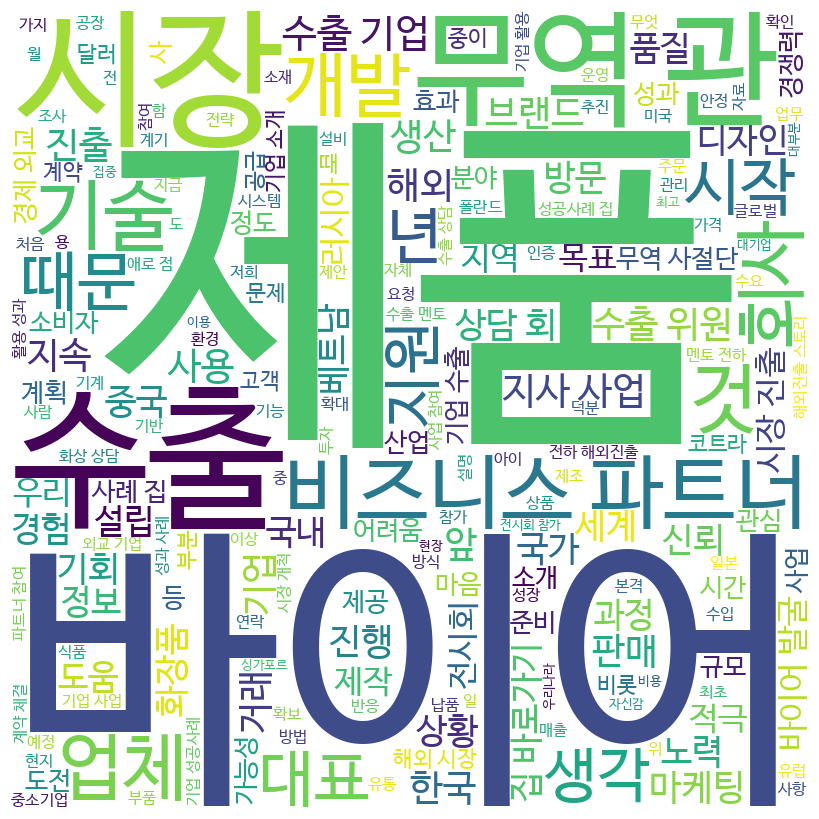

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Configure font manager
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rc('font', family='NanumBarunGothic')

# Join the tokenized words back into a single string
words = [word for sublist in tokenized_abst for word in sublist]
words_string = ' '.join(words)

# Generate the word cloud with the specified font
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # Specify the font path
                      ).generate(words_string)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()